In [6]:
#%%
import datetime
from fractions import Fraction
import json
import math
import os

from dateutil import parser
import matplotlib.pyplot as plt
import pandas as pd
import requests
import xmltodict

# My Goodreads Data 

## How I Need to Change My Book Choices
### Github: Claire-Oh

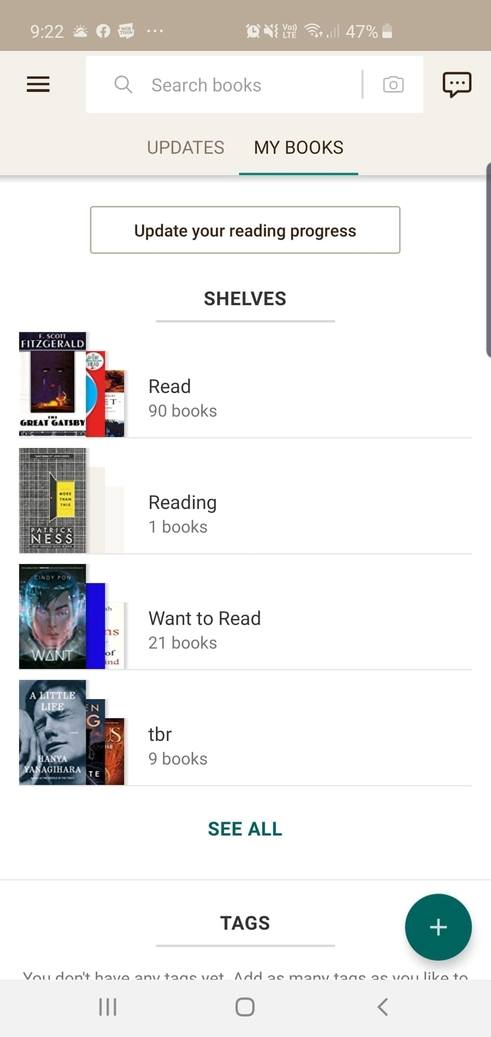

In [7]:
# %%
tb = pd.read_excel(
    "combined_book_data.xlsx", 
    sheet_name="combined", 
    parse_dates=['started_at', 'read_at', 'date_added', 'date_updated']
    )
tb.sort_values(by="started_at", ascending=False, inplace=True)
tb.reset_index(drop=True, inplace=True)

In [5]:
#%%
tb.head()

,book,rating,started_at,read_at,date_added,date_updated,url,title,author_1_id,author_1_name,...,dt_started_at,dt_read_at,dt_added,publication_year,num_pages,format,publisher,ficOrNonFic,SeriesOrStandalone,LGBTQIA_Characters
0,"OrderedDict([('id', OrderedDict([('@type', 'in...",4,2020-08-10,2020-08-10,2020-05-25 22:46:36-07:00,2020-05-25 22:46:37-07:00,https://www.goodreads.com/review/show/3357084330,To Kill a Mockingbird,1825,Harper Lee,...,25569,25569,Mon May 25 22:46:36 -0700 2020,2006,324,Paperback,Harper Perennial Modern Classics,Fiction,Standalone,None
1,"OrderedDict([('id', OrderedDict([('@type', 'in...",4,2020-08-10,2020-08-10,2020-06-23 17:18:07-07:00,2020-07-09 19:14:16-07:00,https://www.goodreads.com/review/show/3407730812,Harry Potter and the Goblet of Fire,1077326,J.K. Rowling,...,25569,25569,Tue Jun 23 17:18:07 -0700 2020,2002,734,Paperback,Scholastic,Fiction,Series,Yes
2,"OrderedDict([('id', OrderedDict([('@type', 'in...",4,2020-08-10,2020-08-10,2020-06-23 17:26:34-07:00,2020-07-09 19:11:12-07:00,https://www.goodreads.com/review/show/3407741912,Lord of the Flies,306,William Golding,...,25569,25569,Tue Jun 23 17:26:34 -0700 2020,1999,182,Paperback,Penguin Books,Fiction,Standalone,None
3,"OrderedDict([('id', OrderedDict([('@type', 'in...",4,2020-08-10,2020-08-10,2020-06-23 17:26:21-07:00,2020-06-23 17:26:21-07:00,https://www.goodreads.com/review/show/3407741603,The Secret Garden,2041,Frances Hodgson Burnett,...,25569,25569,Tue Jun 23 17:26:21 -0700 2020,1998,331,Hardcover,Children's Classics,Fiction,Standalone,None
4,"OrderedDict([('id', OrderedDict([('@type', 'in...",2,2020-08-10,2020-08-10,2020-06-23 17:24:42-07:00,2020-07-09 19:09:58-07:00,https://www.goodreads.com/review/show/3407739537,Breaking Dawn,941441,Stephenie Meyer,...,25569,25569,Tue Jun 23 17:24:42 -0700 2020,2008,756,Hardcover,"Little, Brown and Company",Fiction,Series,None


In [8]:
#%%
tb.dtypes

book                                                  object
rating                                                 int64
started_at                                    datetime64[ns]
read_at                                       datetime64[ns]
date_added            datetime64[ns, pytz.FixedOffset(-420)]
date_updated          datetime64[ns, pytz.FixedOffset(-420)]
url                                                   object
title                                                 object
author_1_id                                            int64
author_1_name                                         object
dt_updated                                            object
dt_started_at                                         object
dt_read_at                                            object
dt_added                                              object
publication_year                                       int64
num_pages                                              int64
format                  

In [9]:
#%%
tb["started_at"] = pd.to_datetime(tb["started_at"])
tb["started_at"]

0    2020-08-11
1    2020-08-11
2    2020-08-11
3    2020-08-11
4    2020-08-11
        ...    
85   2014-08-10
86   2014-08-01
87   2014-06-05
88   2014-06-01
89   2012-04-01
Name: started_at, Length: 90, dtype: datetime64[ns]

In [10]:
#%%
tb["read_at"] = pd.to_datetime(tb["read_at"])
tb["read_at"]

0    2020-08-11
1    2020-08-11
2    2020-08-11
3    2020-08-11
4    2020-08-11
        ...    
85   2014-08-20
86   2014-09-12
87   2014-06-25
88   2014-06-15
89   2012-05-01
Name: read_at, Length: 90, dtype: datetime64[ns]

In [12]:
#%%
date_start_range = tb[tb["started_at"].between('2012-01-01', '2020-08-09')]
date_current_range = tb[tb["started_at"].between('2020-01-01', '2020-08-09')]

In [13]:
#%%
tb_dates = date_start_range.set_index('started_at')
tb_dates.head(3)

,book,rating,read_at,date_added,date_updated,url,title,author_1_id,author_1_name,dt_updated,dt_started_at,dt_read_at,dt_added,publication_year,num_pages,format,publisher,ficOrNonFic,SeriesOrStandalone,LGBTQIA_Characters
started_at,,,,,,,,,,,,,,,,,,,,
2020-06-30,"OrderedDict([('id', OrderedDict([('@type', 'in...",2,2020-07-01,2020-05-28 03:43:54-07:00,2020-07-01 02:36:43-07:00,https://www.goodreads.com/review/show/3361122451,Chapter One: You have the power to change stuff,3060790,Daniel Flynn,Wed Jul 01 02:36:43 -0700 2020,Tue Jun 30 03:43:46 -0700 2020,Wed Jul 01 02:36:43 -0700 2020,Thu May 28 03:43:54 -0700 2020,2016,254,Paperback,The Messenger Group,NonFiction,Standalone,None
2020-06-30,"OrderedDict([('id', OrderedDict([('@type', 'in...",3,2020-07-01,2020-06-30 03:31:37-07:00,2020-07-01 05:00:12-07:00,https://www.goodreads.com/review/show/3418332252,The Architecture of Happiness,13199,Alain de Botton,Wed Jul 01 05:00:12 -0700 2020,Tue Jun 30 03:31:37 -0700 2020,Wed Jul 01 05:00:12 -0700 2020,Tue Jun 30 03:31:37 -0700 2020,2006,280,Hardcover,Pantheon Books,NonFiction,Standalone,None
2020-06-20,"OrderedDict([('id', OrderedDict([('@type', 'in...",3,2020-06-30,2020-05-25 22:54:51-07:00,2020-06-30 03:27:13-07:00,https://www.goodreads.com/review/show/3357092801,The Gentleman's Guide to Vice and Virtue,7327341,Mackenzi Lee,Tue Jun 30 03:27:13 -0700 2020,Sat Jun 20 01:50:18 -0700 2020,Tue Jun 30 03:27:13 -0700 2020,Mon May 25 22:54:51 -0700 2020,2017,513,Hardcover,Katherine Tegen Books,Fiction,Standalone,Yes


In [14]:
#%%
tb_dates.index

DatetimeIndex(['2020-06-30', '2020-06-30', '2020-06-20', '2020-06-18',
               '2020-06-13', '2020-06-09', '2020-06-09', '2020-06-04',
               '2020-05-27', '2020-05-27', '2020-05-01', '2020-04-29',
               '2020-04-16', '2020-04-10', '2020-04-01', '2020-03-25',
               '2020-03-18', '2020-03-10', '2020-01-15', '2019-12-10',
               '2019-11-13', '2019-11-11', '2019-07-30', '2019-07-10',
               '2019-03-14', '2019-02-01', '2019-01-12', '2018-11-28',
               '2018-09-18', '2018-09-10', '2018-03-18', '2018-03-18',
               '2017-07-10', '2017-02-01', '2016-05-10', '2016-04-11',
               '2016-02-25', '2016-01-01', '2015-03-06', '2015-03-01',
               '2015-03-01', '2014-10-11', '2014-09-01', '2014-08-15',
               '2014-08-10', '2014-08-01', '2014-06-05', '2014-06-01',
               '2012-04-01'],
              dtype='datetime64[ns]', name='started_at', freq=None)

In [15]:
#%%
tb_dates['Year'] = tb_dates.index.year
tb_dates['Month'] = tb_dates.index.month
tb_dates.head(3)

,book,rating,read_at,date_added,date_updated,url,title,author_1_id,author_1_name,dt_updated,...,dt_added,publication_year,num_pages,format,publisher,ficOrNonFic,SeriesOrStandalone,LGBTQIA_Characters,Year,Month
started_at,,,,,,,,,,,,,,,,,,,,,
2020-06-30,"OrderedDict([('id', OrderedDict([('@type', 'in...",2,2020-07-01,2020-05-28 03:43:54-07:00,2020-07-01 02:36:43-07:00,https://www.goodreads.com/review/show/3361122451,Chapter One: You have the power to change stuff,3060790,Daniel Flynn,Wed Jul 01 02:36:43 -0700 2020,...,Thu May 28 03:43:54 -0700 2020,2016,254,Paperback,The Messenger Group,NonFiction,Standalone,None,2020,6
2020-06-30,"OrderedDict([('id', OrderedDict([('@type', 'in...",3,2020-07-01,2020-06-30 03:31:37-07:00,2020-07-01 05:00:12-07:00,https://www.goodreads.com/review/show/3418332252,The Architecture of Happiness,13199,Alain de Botton,Wed Jul 01 05:00:12 -0700 2020,...,Tue Jun 30 03:31:37 -0700 2020,2006,280,Hardcover,Pantheon Books,NonFiction,Standalone,None,2020,6
2020-06-20,"OrderedDict([('id', OrderedDict([('@type', 'in...",3,2020-06-30,2020-05-25 22:54:51-07:00,2020-06-30 03:27:13-07:00,https://www.goodreads.com/review/show/3357092801,The Gentleman's Guide to Vice and Virtue,7327341,Mackenzi Lee,Tue Jun 30 03:27:13 -0700 2020,...,Mon May 25 22:54:51 -0700 2020,2017,513,Hardcover,Katherine Tegen Books,Fiction,Standalone,Yes,2020,6


In [ ]:
#%%
plt.rcParams["figure.figsize"] = (11, 8)
fig, ax = plt.subplots()
marker = "-"
for index, row in date_current_range.iterrows():        
    ax.plot_date(
        [row.started_at, row.read_at],
        [index, index],
        fmt=marker,
        tz=None,
        xdate=True,
        ydate=False,
        lw=2.5,
    )
            
    ax.text(
        row.started_at,
        index,
        f"{row.title}",
        fontsize=3,
        verticalalignment="center",
    )

fig.autofmt_xdate()
plt.grid(True)
plt.title("Books and Duration of 2020")
plt.savefig(f"out/bookWaterfall", bbox_inches="tight")
plt.savefig(f"out/bookWaterfall.pdf", bbox_inches="tight")

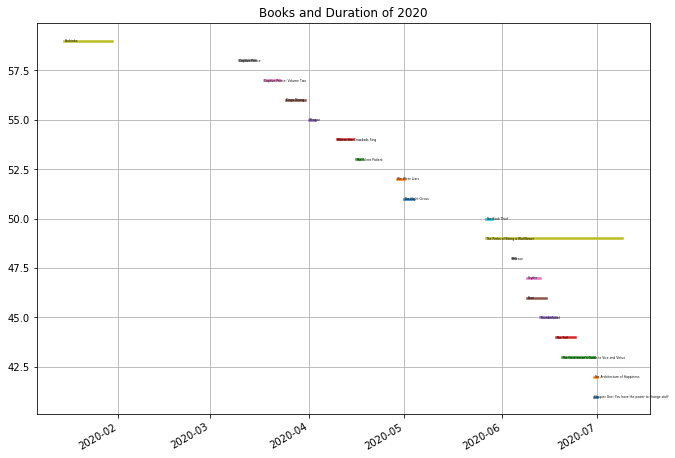

In [ ]:
#%%
plt.rcParams["figure.figsize"] = (11, 8)
fig, ax = plt.subplots()

for index, row in date_start_range.iterrows():
    marker = "-"
    ax.plot_date(
        [row.started_at, row.read_at],
        [index, index],
        fmt=marker,
        tz=None,
        xdate=True,
        ydate=False,
        lw=2.5,
    )
    ax.text(
        row.started_at,
        index,
        f"{row.title}",
        fontsize=2,
        verticalalignment="center",
    )

fig.autofmt_xdate()
ax.set_xlim([datetime.date(2012, 1, 1), datetime.date(2020, 8, 1)])
plt.tick_params(axis="y", which="both", left=False, right=False, labelleft=False)
plt.grid(True)
plt.title("Books and Duration Since 2012")
plt.savefig(f"out/bookWaterfall2012", bbox_inches="tight")
plt.savefig(f"out/bookWaterfall2012.pdf", bbox_inches="tight")

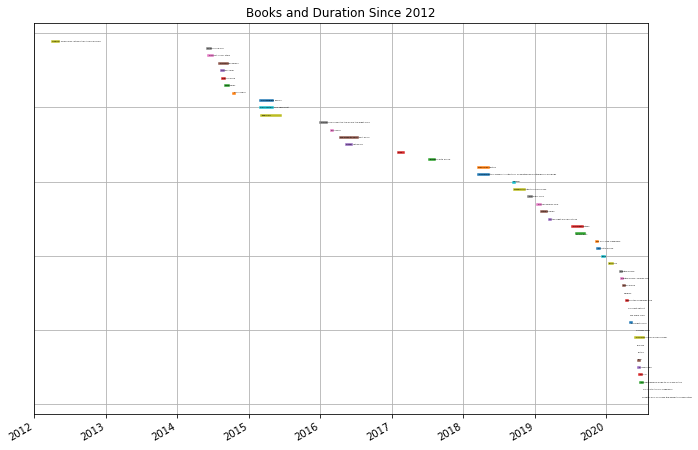

In [18]:
#%%
cols_to_drop = [
    "Unnamed: 0",
    "read_at",
    "date_added",
    "date_updated",
    "html_link",
]
for c in cols_to_drop:
    try:
        tb.drop(c, axis=1, inplace=True)
    except Exception as e:
        print(e)
try:
    tb["book"] = tb.apply(
        lambda x: eval(x.book.replace("OrderedDict", "dict")), axis=1
    )
except:
    pass
    # must have already done this step
#%%
def dataise(d):
    if type(d) is str:
        return eval(d)
    else:
        return d


tb.book = tb.book.apply(dataise)
tb.head()

"['Unnamed: 0'] not found in axis"
"['html_link'] not found in axis"


,book,rating,started_at,url,title,author_1_id,author_1_name,dt_updated,dt_started_at,dt_read_at,dt_added,publication_year,num_pages,format,publisher,ficOrNonFic,SeriesOrStandalone,LGBTQIA_Characters
0,"{'id': {'@type': 'integer', '#text': '2657'}, ...",4,2020-08-11,https://www.goodreads.com/review/show/3357084330,To Kill a Mockingbird,1825,Harper Lee,Mon May 25 22:46:37 -0700 2020,25569,25569,Mon May 25 22:46:36 -0700 2020,2006,324,Paperback,Harper Perennial Modern Classics,Fiction,Standalone,None
1,"{'id': {'@type': 'integer', '#text': '6'}, 'is...",4,2020-08-11,https://www.goodreads.com/review/show/3407730812,Harry Potter and the Goblet of Fire,1077326,J.K. Rowling,Thu Jul 09 19:14:16 -0700 2020,25569,25569,Tue Jun 23 17:18:07 -0700 2020,2002,734,Paperback,Scholastic,Fiction,Series,Yes
2,"{'id': {'@type': 'integer', '#text': '7624'}, ...",4,2020-08-11,https://www.goodreads.com/review/show/3407741912,Lord of the Flies,306,William Golding,Thu Jul 09 19:11:12 -0700 2020,25569,25569,Tue Jun 23 17:26:34 -0700 2020,1999,182,Paperback,Penguin Books,Fiction,Standalone,None
3,"{'id': {'@type': 'integer', '#text': '2998'}, ...",4,2020-08-11,https://www.goodreads.com/review/show/3407741603,The Secret Garden,2041,Frances Hodgson Burnett,Tue Jun 23 17:26:21 -0700 2020,25569,25569,Tue Jun 23 17:26:21 -0700 2020,1998,331,Hardcover,Children's Classics,Fiction,Standalone,None
4,"{'id': {'@type': 'integer', '#text': '1162543'...",2,2020-08-11,https://www.goodreads.com/review/show/3407739537,Breaking Dawn,941441,Stephenie Meyer,Thu Jul 09 19:09:58 -0700 2020,25569,25569,Tue Jun 23 17:24:42 -0700 2020,2008,756,Hardcover,"Little, Brown and Company",Fiction,Series,None


In [19]:
#%%
plt.rcParams["figure.figsize"] = (8, 8)

In [20]:
# %%
print(
    f"Median year: {int(tb.publication_year.median())}, mean year: {int(tb.publication_year.mean())}"
)

Median year: 2005, mean year: 2006


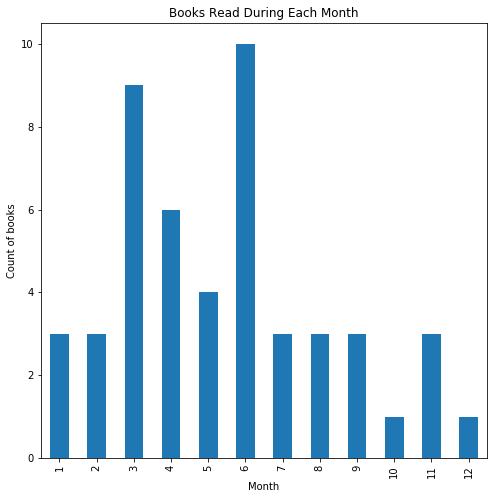

In [21]:
#%%
tb_dates.Month.value_counts().sort_index().plot(kind="bar")
plt.title("Books Read During Each Month")
plt.ylabel("Count of books")
plt.xlabel("Month")
plt.savefig(f"out/publicationYearBar", bbox_inches="tight")

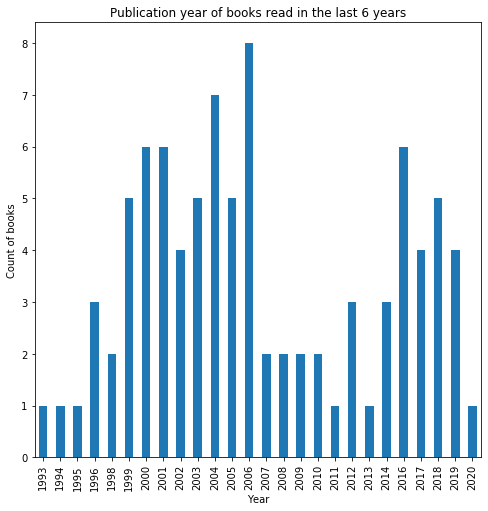

In [22]:
#%%
tb.publication_year.value_counts().sort_index().plot(kind="bar")
plt.title("Publication year of books")
plt.ylabel("Count of books")
plt.xlabel("Year")
plt.savefig(f"out/publicationYearBar", bbox_inches="tight")

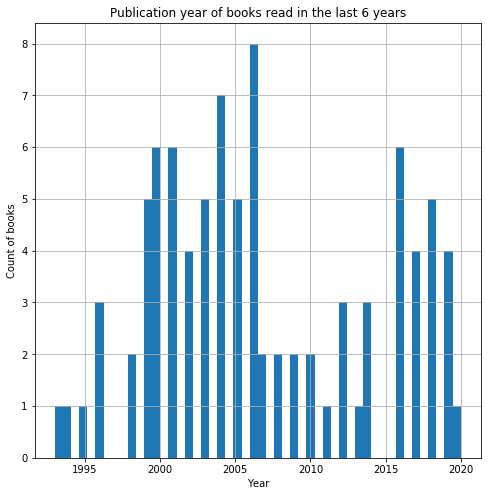

In [23]:
#%%
tb.publication_year.hist(bins=50)
plt.title("Publication year of books read in the last 6 years")
plt.ylabel("Count of books")
plt.xlabel("Year")
plt.savefig(f"out/publicationYearHist", bbox_inches="tight")

Median pages: 312, mean pages: 335


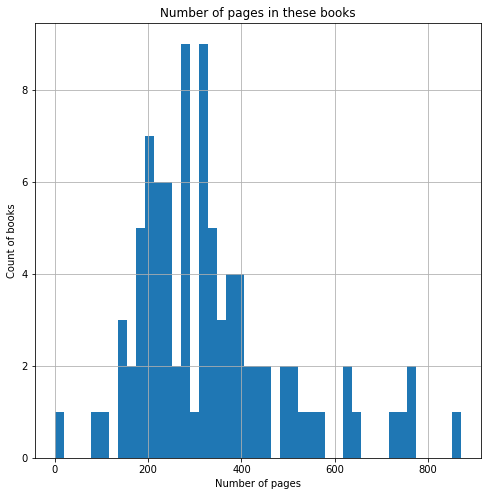

In [24]:
#%%
print(
    f"Median pages: {int(tb.num_pages.median())}, "
    f"mean pages: {int(tb.num_pages.mean())}"
)
tb.num_pages.hist(bins=45)
plt.title("Number of pages in these books")
plt.ylabel("Count of books")
plt.xlabel("Number of pages")
plt.savefig(f"out/numPages", bbox_inches="tight")

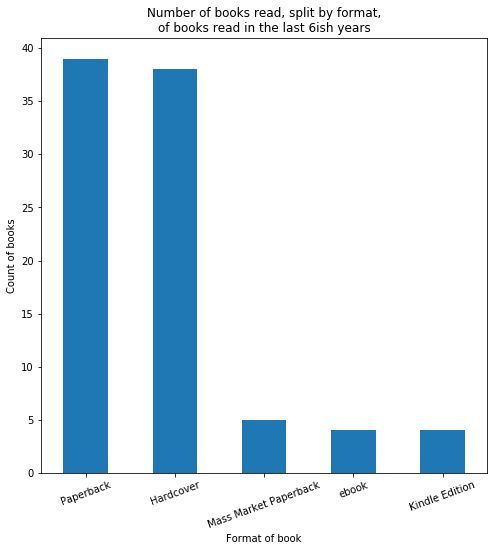

In [25]:
#%%
tb.format.value_counts().plot(kind="bar", rot=20)
plt.title(
    "Number of books read, split by format,\nof books read in the last 6ish years"
)
plt.ylabel("Count of books")
plt.xlabel("Format of book")
plt.savefig(f"out/format", bbox_inches="tight")

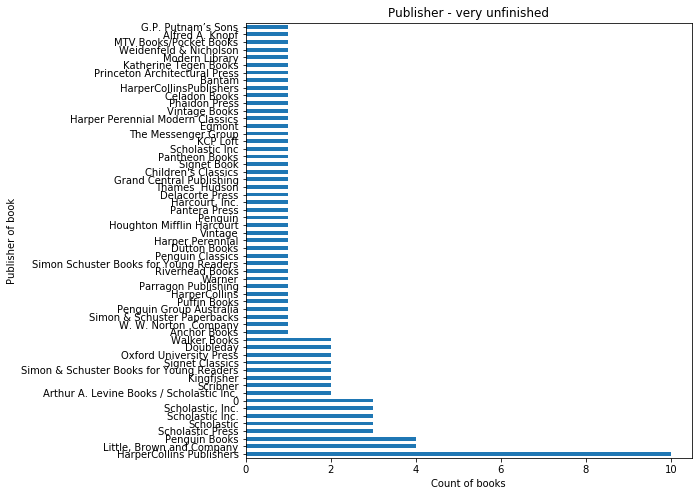

In [28]:
#%%
tb.publisher.value_counts().plot.barh()
plt.title("Publisher - very unfinished")
plt.xlabel("Count of books")
plt.ylabel("Publisher of book")
plt.savefig(f"out/publisher", bbox_inches="tight")

In [ ]:
#%%
tb.rating.hist(bins=4)
plt.title("My rating")
plt.ylabel("Count of books")
plt.xlabel("What I've rated this book")

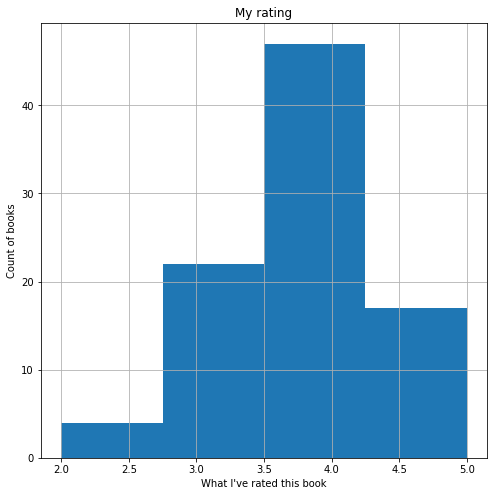

In [29]:
#%%
tb.rating.hist(bins=4)
plt.title("My rating")
plt.ylabel("Count of books")
plt.xlabel("What I've rated this book")
plt.savefig(f"out/rating", bbox_inches="tight")

Text(0.5, 0, 'Rating')

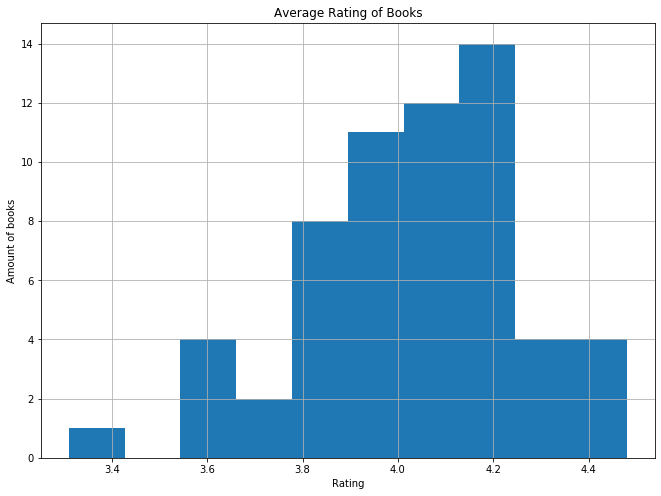

In [74]:
#%%
authors_df.average_rating.hist()
plt.title("Average Rating of Books")
plt.ylabel("Amount of books")
plt.xlabel("Rating")

# Data I researched and added
1. Fiction Non-Fiction
2. Series Stand-Alone
3. LGBTQIA Characters

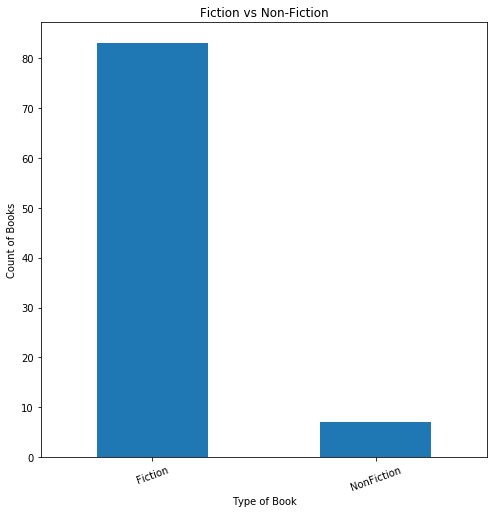

In [30]:
#%%
tb.ficOrNonFic.value_counts().plot(kind="bar", rot=20)
plt.title("Fiction vs Non-Fiction")
plt.ylabel("Count of Books")
plt.xlabel("Type of Book")
plt.savefig(f"out/ficnonfic", bbox_inches="tight")

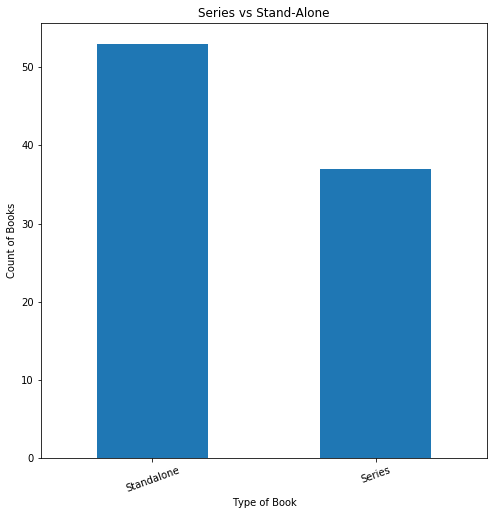

In [31]:
#%%
tb.SeriesOrStandalone.value_counts().plot(kind="bar", rot=20)
plt.title("Series vs Stand-Alone")
plt.ylabel("Count of Books")
plt.xlabel("Type of Book")
plt.savefig(f"out/seriesstandalone", bbox_inches="tight")

# LGBTQIA Characters in my books were determined by stating their sexuality not by implication.

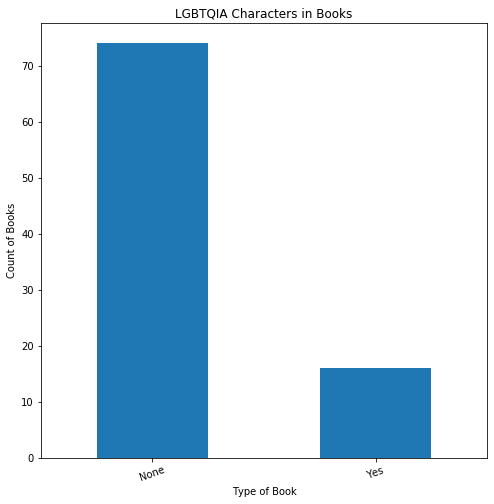

In [32]:
#%%
tb.LGBTQIA_Characters.value_counts().plot(kind="bar", rot=20)
plt.title("LGBTQIA Characters in Books")
plt.ylabel("Count of Books")
plt.xlabel("Type of Book")
plt.savefig(f"out/seriesstandalone", bbox_inches="tight")

In [35]:
#%%
all_authors = []
for index, row in tb.iterrows():
    all_authors.append(row.book["authors"]["author"])
authors_df = pd.DataFrame(all_authors)
authors_df.drop_duplicates(subset="name", inplace=True)
authors_df.reset_index(drop=True, inplace=True)
authors_df.average_rating = authors_df.average_rating.apply(float)
cols_to_drop = ["image_url", "role", "small_image_url"]
for c in cols_to_drop:
    try:
        authors_df.drop(c, axis=1, inplace=True)
    except Exception as e:
        print(e)
authors_df.to_excel("temp_authors.xlsx")
authors_df.head()

,id,name,link,average_rating,ratings_count,text_reviews_count
0,1825,Harper Lee,https://www.goodreads.com/author/show/1825.Har...,4.23,4645028,119679
1,1077326,J.K. Rowling,https://www.goodreads.com/author/show/1077326....,4.46,25095470,576151
2,306,William Golding,https://www.goodreads.com/author/show/306.Will...,3.68,2242645,38059
3,2041,Frances Hodgson Burnett,https://www.goodreads.com/author/show/2041.Fra...,4.14,1183919,28506
4,941441,Stephenie Meyer,https://www.goodreads.com/author/show/941441.S...,3.65,10603070,318928


# Ethnicities were crudely represented in categories of White, Asian, Black and Hispanic. These categories by no means represents everyones ethnicity and has been generalised for the sake of simplyfing my data.

In [39]:
#%%
authors_df = pd.read_excel("Combined_Authors.xlsx")
authors_df.head()

,0,book,name,link,average_rating,ratings_count,text_reviews_count,gender,ethnicity,LGBTQI_Authors,Nationality,DeadorAlive
0,0,"OrderedDict([('id', OrderedDict([('@type', 'in...",Grégoire Delacourt,https://www.goodreads.com/author/show/3060790....,4.19,587,83,Male,White,Straight,French,Alive
1,1,"OrderedDict([('id', OrderedDict([('@type', 'in...",Arthur Miller,https://www.goodreads.com/author/show/13199.Al...,3.88,155778,14781,Male,White,Straight,American,Dead
2,2,"OrderedDict([('id', OrderedDict([('@type', 'in...",William J.R. Curtis,https://www.goodreads.com/author/show/7327341....,4.10,128995,25156,Male,White,Straight,British,Alive
3,3,"OrderedDict([('id', OrderedDict([('@type', 'in...",James Joyce,https://www.goodreads.com/author/show/19564.Ne...,4.22,673751,88384,Male,White,Straight,Irish,Dead
4,4,"OrderedDict([('id', OrderedDict([('@type', 'in...",C.S. Lewis,https://www.goodreads.com/author/show/370361.P...,4.12,629642,86901,Male,White,Straight,British,Dead


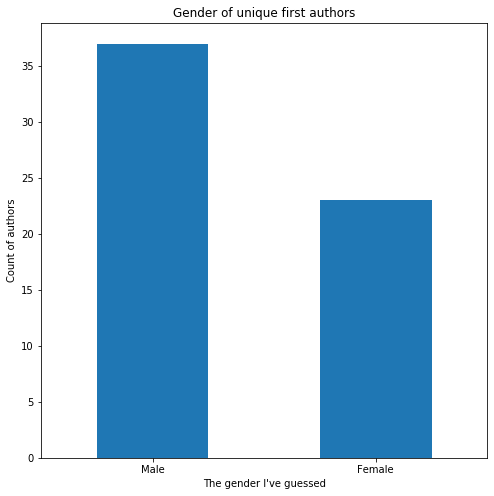

In [40]:
#%%
authors_df.gender.value_counts().plot(kind="bar", rot=0)
plt.title("Gender of unique first authors")
plt.ylabel("Count of authors")
plt.xlabel("The gender I've guessed")
plt.savefig(f"out/Gender_count_of_unique_first_authors", bbox_inches="tight")

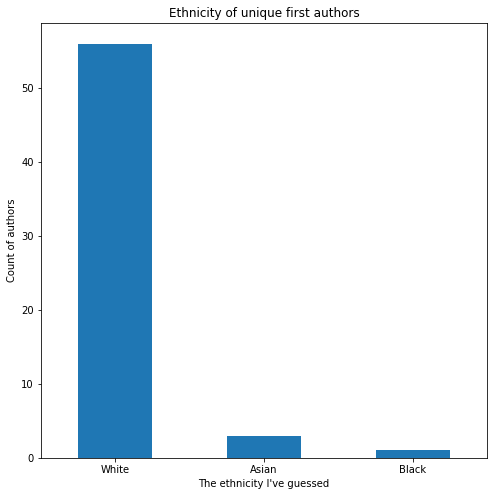

In [41]:
#%%
authors_df.ethnicity.value_counts().plot(kind="bar", rot=0)
plt.title("Ethnicity of unique first authors")
plt.ylabel("Count of authors")
plt.xlabel("The ethnicity I've guessed")
plt.savefig(f"out/first_author_ethnicity", bbox_inches="tight")

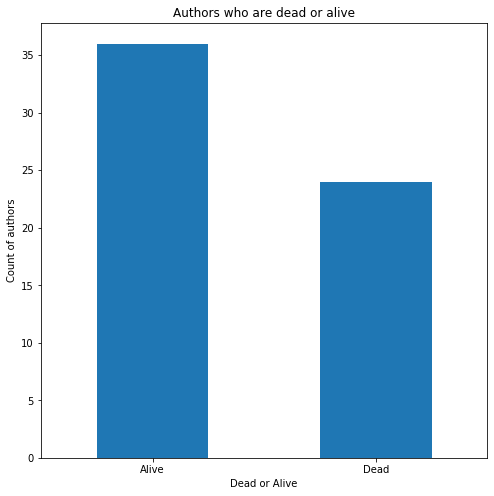

In [42]:
#%%
authors_df.DeadorAlive.value_counts().plot(kind="bar", rot=0)
plt.title("Authors who are dead or alive")
plt.ylabel("Count of authors")
plt.xlabel("Dead or Alive")
plt.savefig(f"out/first_author_life", bbox_inches="tight")

# The nationality was based off the authors place of birth or the country that the author most identified as home.

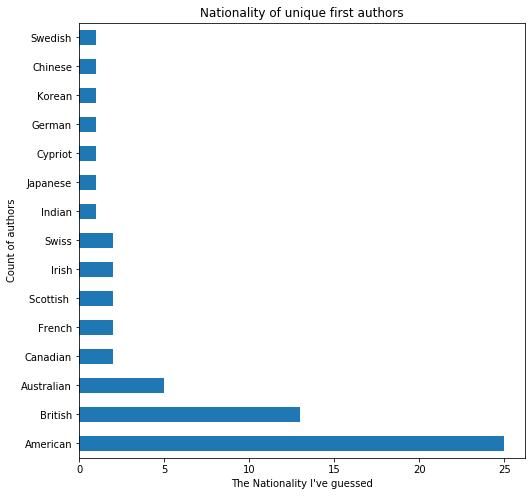

In [43]:
#%%
authors_df.Nationality.value_counts()[:30].plot.barh()
plt.title("Nationality of unique first authors")
plt.ylabel("Count of authors")
plt.xlabel("The Nationality I've guessed")
plt.savefig(f"out/first_author_nationality", bbox_inches="tight")

# The sexuality of the authors were determined by their personal coming out. The unkown category is by people who has passed away but have significant evidence of their sexuality.

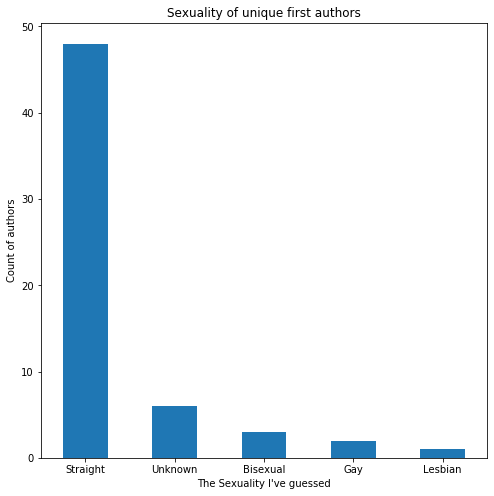

In [44]:
#%%
authors_df.LGBTQI_Authors.value_counts().plot(kind="bar", rot=0)
plt.title("Sexuality of unique first authors")
plt.ylabel("Count of authors")
plt.xlabel("The Sexuality I've guessed")
plt.savefig(f"out/first_author_sexuality", bbox_inches="tight")

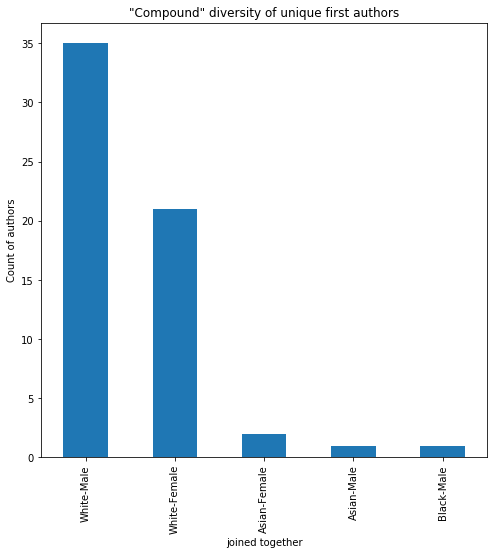

In [45]:
#%%
authors_df["compound_diversity"] = authors_df.apply(
    lambda x: f"{x.ethnicity}-{x.gender}", axis=1
)
authors_df.compound_diversity.value_counts().plot(kind="bar")
plt.title('"Compound" diversity of unique first authors')
plt.ylabel("Count of authors")
plt.xlabel("joined together")
plt.savefig(f"out/compundDiversity", bbox_inches="tight")

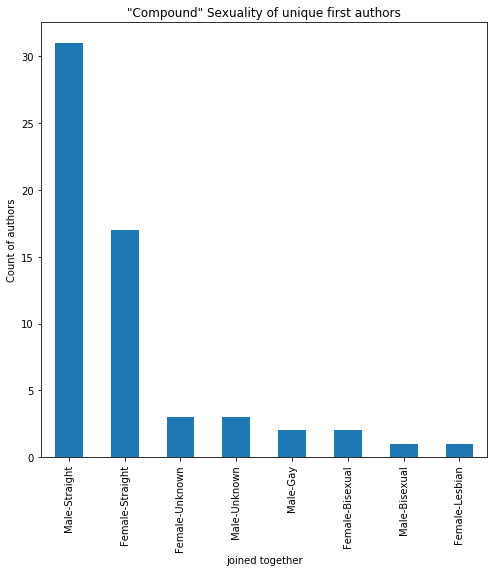

In [46]:
#%%
authors_df["compound_sexuality"] = authors_df.apply(
    lambda x: f"{x.gender}-{x.LGBTQI_Authors}", axis=1
)
authors_df.compound_sexuality.value_counts().plot(kind="bar")
plt.title('"Compound" Sexuality of unique first authors')
plt.ylabel("Count of authors")
plt.xlabel("joined together")
plt.savefig(f"out/compundSexuality", bbox_inches="tight")

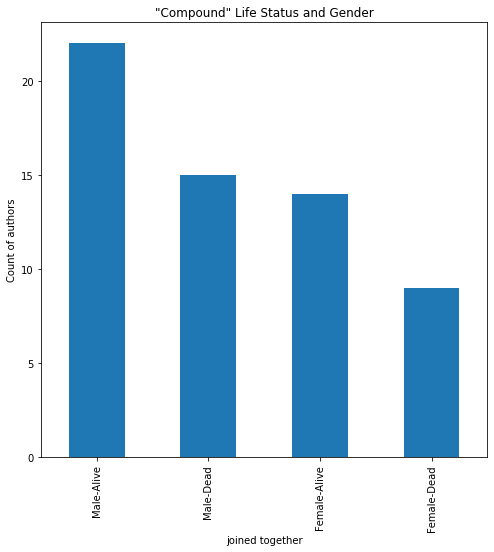

In [47]:
#%%
authors_df["compound_genderalive"] = authors_df.apply(
    lambda x: f"{x.gender}-{x.DeadorAlive}", axis=1
)
authors_df.compound_genderalive.value_counts().plot(kind="bar")
plt.title('"Compound" Life Status and Gender')
plt.ylabel("Count of authors")
plt.xlabel("joined together")
plt.savefig(f"out/compundSexuality", bbox_inches="tight")

In [48]:
#%%
all_df = tb.merge(authors_df, right_on="name", left_on="author_1_name")
all_df.sample(4)

,book_x,rating,started_at,url,title,author_1_id,author_1_name,dt_updated,dt_started_at,dt_read_at,...,ratings_count,text_reviews_count,gender,ethnicity,LGBTQI_Authors,Nationality,DeadorAlive,compound_diversity,compound_sexuality,compound_genderalive
47,"{'id': {'@type': 'integer', '#text': '45714170...",4,2020-06-09,https://www.goodreads.com/review/show/3375320193,Burn,370361,Patrick Ness,Tue Jun 09 06:32:11 -0700 2020,Tue Jun 09 06:31:52 -0700 2020,Tue Jun 09 06:32:11 -0700 2020,...,17863,2553,Male,White,Gay,American,Alive,White-Male,Male-Gay,Male-Alive
50,"{'id': {'@type': 'integer', '#text': '19063'},...",4,2020-05-27,https://www.goodreads.com/review/show/3359227447,The Book Thief,11466,Markus Zusak,Sun May 31 06:09:34 -0700 2020,Wed May 27 04:33:39 -0700 2020,Thu May 28 01:06:00 -0700 2020,...,1952999,71723,Male,White,Straight,Australian,Alive,White-Male,Male-Straight,Male-Alive
57,"{'id': {'@type': 'integer', '#text': '17158532...",4,2020-03-25,https://www.goodreads.com/review/show/3407727934,Kings Rising,4349837,C.S. Pacat,Thu Jul 09 19:04:17 -0700 2020,25569,25569,...,6630197,348077,Female,White,Bisexual,Australian,Alive,White-Female,Female-Bisexual,Female-Alive
28,"{'id': {'@type': 'integer', '#text': '65110'},...",5,2020-08-11,https://www.goodreads.com/review/show/3407753027,The Penultimate Peril,36746,Lemony Snicket,Thu Jul 09 19:09:10 -0700 2020,25569,25569,...,832718,77429,Male,White,Straight,American,Alive,White-Male,Male-Straight,Male-Alive


In [49]:
#%%
known_df = tb_dates.merge(authors_df, right_on="name", left_on="author_1_name")
known_df.sample(4)

,book_x,rating,read_at,date_added,date_updated,url,title,author_1_id,author_1_name,dt_updated,...,ratings_count,text_reviews_count,gender,ethnicity,LGBTQI_Authors,Nationality,DeadorAlive,compound_diversity,compound_sexuality,compound_genderalive
46,"OrderedDict([('id', OrderedDict([('@type', 'in...",4,2014-06-25,2020-05-27 04:44:02-07:00,2020-05-27 04:44:06-07:00,https://www.goodreads.com/review/show/3359237475,The Fault in Our Stars,1406384,John Green,Wed May 27 04:44:06 -0700 2020,...,5900626,166798,Male,White,Straight,American,Alive,White-Male,Male-Straight,Male-Alive
11,"OrderedDict([('id', OrderedDict([('@type', 'in...",3,2020-05-01,2020-05-28 03:44:12-07:00,2020-06-30 03:29:26-07:00,https://www.goodreads.com/review/show/3361122656,We Were Liars,173491,E. Lockhart,Tue Jun 30 03:29:26 -0700 2020,...,817647,63561,Female,White,Straight,American,Alive,White-Female,Female-Straight,Female-Alive
23,"OrderedDict([('id', OrderedDict([('@type', 'in...",4,2019-09-09,2020-05-25 22:50:35-07:00,2020-07-09 19:21:21-07:00,https://www.goodreads.com/review/show/3357088474,Sea of Rust,3969859,C. Robert Cargill,Thu Jul 09 19:21:21 -0700 2020,...,1167163,34600,Male,White,Unknown,American,Alive,White-Male,Male-Unknown,Male-Alive
18,"OrderedDict([('id', OrderedDict([('@type', 'in...",4,2020-03-15,2020-05-25 22:56:59-07:00,2020-05-29 02:06:40-07:00,https://www.goodreads.com/review/show/3357094946,Captive Prince,4349837,C.S. Pacat,Fri May 29 02:06:40 -0700 2020,...,6630197,348077,Female,White,Bisexual,Australian,Alive,White-Female,Female-Bisexual,Female-Alive


In [52]:
#%%
all_df["reading_year"] = all_df.started_at.apply(lambda x: x.year)

In [53]:
#%%
# from : https://stackoverflow.com/a/34919066/1835727
diversity_data = known_df.groupby(["Year", "compound_diversity"]).size().unstack()

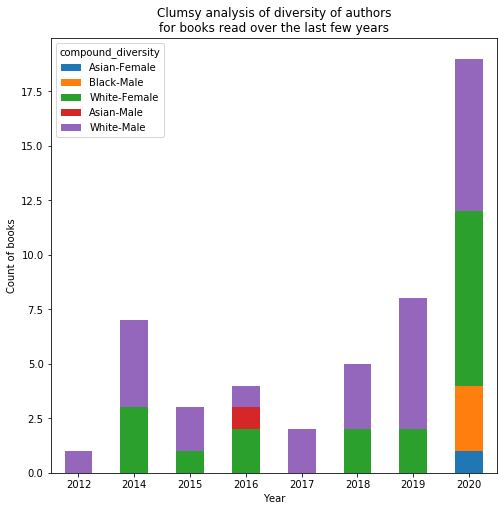

In [54]:
#%%
diversity_data = diversity_data[
    [
        "Asian-Female",
        "Black-Male",
        "White-Female",
        "Asian-Male",
        "White-Male",
    ]
]
diversity_data.plot(kind="bar", stacked=True, rot=0)

plt.title(
    "Clumsy analysis of diversity of authors\nfor books read over the last few years"
)
plt.ylabel("Count of books")
plt.xlabel("Year")
plt.savefig(f"out/clumsyDiversity", bbox_inches="tight")

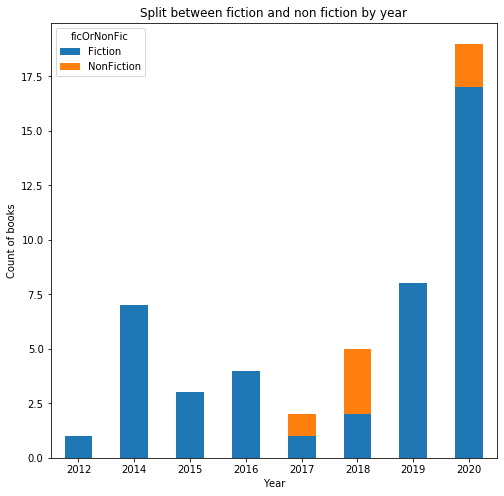

In [55]:
#%%
fic_data = (
    known_df.groupby(["Year", "ficOrNonFic"])
    .size()
    .unstack()
    .plot(kind="bar", stacked=True, rot=0)
)
plt.title("Split between fiction and non fiction by year")
plt.ylabel("Count of books")
plt.xlabel("Year")
plt.savefig(f"out/anualFic_Nonfic", bbox_inches="tight")

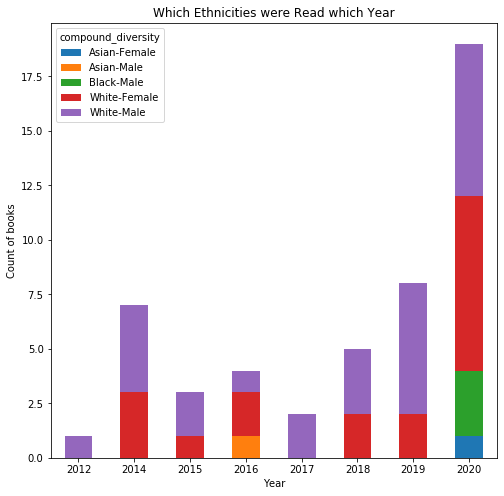

In [56]:
#%%
fic_data = (
    known_df.groupby(["Year", "compound_diversity"])
    .size()
    .unstack()
    .plot(kind="bar", stacked=True, rot=0)
)
plt.title("Which Ethnicities were Read which Year")
plt.ylabel("Count of books")
plt.xlabel("Year")
plt.savefig(f"out/anualFic_Nonfic", bbox_inches="tight")

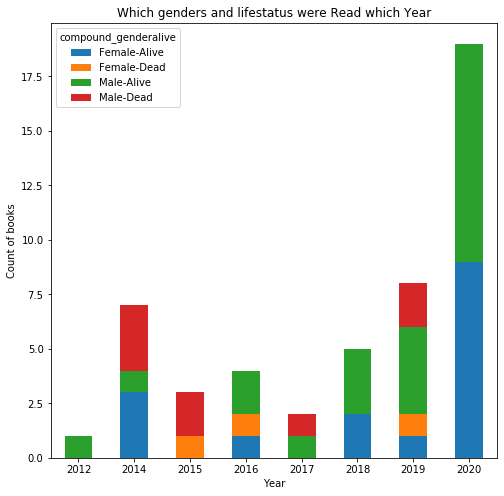

In [57]:
#%%
fic_data = (
    known_df.groupby(["Year", "compound_genderalive"])
    .size()
    .unstack()
    .plot(kind="bar", stacked=True, rot=0)
)
plt.title("Which genders and lifestatus were Read which Year")
plt.ylabel("Count of books")
plt.xlabel("Year")
plt.savefig(f"out/anualFic_Nonfic", bbox_inches="tight")

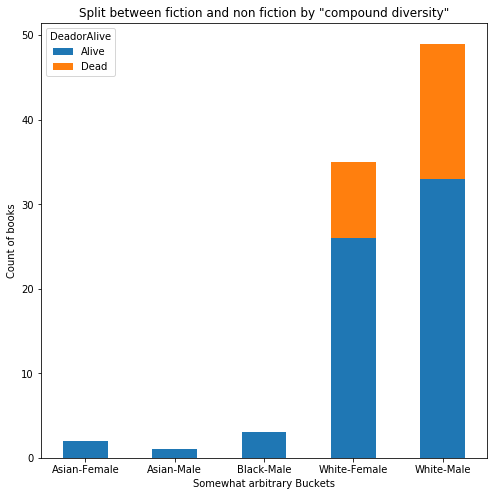

In [58]:
#%%
fic_data = (
    all_df.groupby(["compound_diversity", "DeadorAlive"])
    .size()
    .unstack()
    .plot(kind="bar", stacked=True, rot=0)
)
plt.title('Split between life status by "compound diversity"')
plt.ylabel("Count of books")
plt.xlabel("Somewhat arbitrary Buckets")
plt.savefig(f"out/compound_diversity_Fic_Nonfic", bbox_inches="tight")

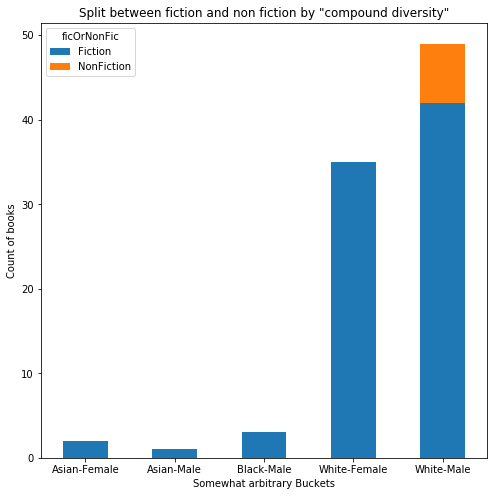

In [59]:
#%%
fic_data = (
    all_df.groupby(["compound_diversity", "ficOrNonFic"])
    .size()
    .unstack()
    .plot(kind="bar", stacked=True, rot=0)
)
plt.title('Split between fiction and non fiction by "compound diversity"')
plt.ylabel("Count of books")
plt.xlabel("Somewhat arbitrary Buckets")
plt.savefig(f"out/compound_diversity_Fic_Nonfic", bbox_inches="tight")

In [60]:
#%%
os.listdir("out")

['anualFic_Nonfic.png',
 'author_top_30.png',
 'bookWaterfall.pdf',
 'bookWaterfall.png',
 'bookWaterfall2012.pdf',
 'bookWaterfall2012.png',
 'clumsyDiversity.png',
 'compound_diversityAvePages.png',
 'compound_diversityBarByPages.png',
 'compound_diversity_Fic_Nonfic.png',
 'compound_diversity_Fic_Nonfic_byPages.png',
 'compundDiversity.png',
 'compundSexuality.png',
 'Ethnicity_of_books_read.png',
 'ficnonfic.png',
 'first_author_ethnicity.png',
 'first_author_life.png',
 'first_author_nationality.png',
 'first_author_sexuality.png',
 'format.png',
 'formatBarByPages.png',
 'Gender_count_of_unique_first_authors.png',
 'gender_of_books_read.png',
 'numPages.png',
 'placeholder',
 'publicationYearBar.png',
 'publicationYearBarByPages.png',
 'publicationYearHist.png',
 'publication_yearBarByPages.png',
 'publisher.png',
 'rating.png',
 'reading_yearBarByBookCount.png',
 'reading_yearBarByPages.png',
 'seriesstandalone.png',
 'sexygenderyAvePages.png']

In [61]:
#%%
all_df.columns

Index([              'book_x',               'rating',           'started_at',
                        'url',                'title',          'author_1_id',
              'author_1_name',           'dt_updated',        'dt_started_at',
                 'dt_read_at',             'dt_added',     'publication_year',
                  'num_pages',               'format',            'publisher',
                'ficOrNonFic',   'SeriesOrStandalone',   'LGBTQIA_Characters',
                            0,               'book_y',                 'name',
                       'link',       'average_rating',        'ratings_count',
         'text_reviews_count',               'gender',            'ethnicity',
             'LGBTQI_Authors',          'Nationality',          'DeadorAlive',
         'compound_diversity',   'compound_sexuality', 'compound_genderalive',
               'reading_year'],
      dtype='object')

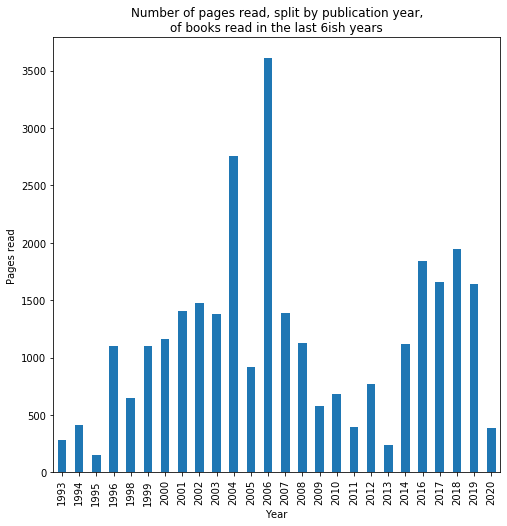

In [62]:
#%%
all_df.groupby("publication_year").sum().num_pages.sort_index().plot(kind="bar")
plt.title(
    "Number of pages read, split by publication year,"
    "\nof books read in the last 6ish years"
)
plt.ylabel("Pages read")
plt.xlabel("Year")
plt.savefig(f"out/publication_yearBarByPages", bbox_inches="tight")

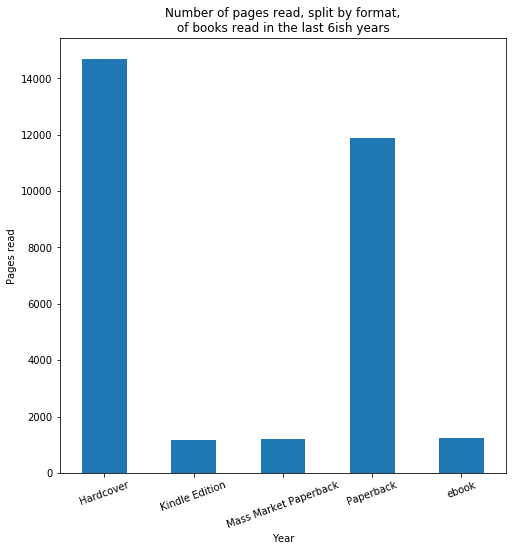

In [63]:
#%%
all_df.groupby("format").sum().num_pages.sort_index().plot(kind="bar", rot=20)
plt.title(
    "Number of pages read, split by format,\nof books read in the last 6ish years"
)
plt.ylabel("Pages read")
plt.xlabel("Year")
plt.savefig(f"out/formatBarByPages", bbox_inches="tight")

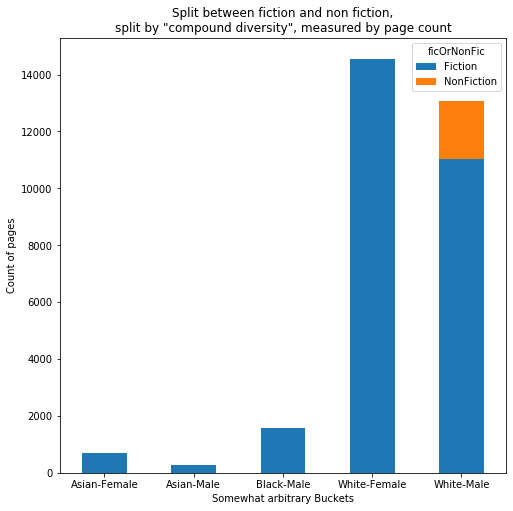

In [64]:
#%%
(
    all_df.groupby(["compound_diversity", "ficOrNonFic"])
    .sum()
    .num_pages.unstack()
    .plot(kind="bar", stacked=True, rot=0)
)
plt.title(
    'Split between fiction and non fiction,\nsplit by "compound diversity", measured by page count'
)
plt.ylabel("Count of pages")
plt.xlabel("Somewhat arbitrary Buckets")
plt.savefig(f"out/compound_diversity_Fic_Nonfic_byPages", bbox_inches="tight")

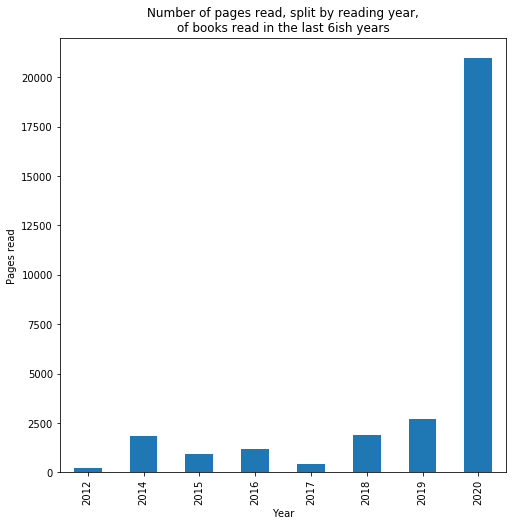

In [65]:
#%%
all_df.groupby("reading_year").sum().num_pages.sort_index().plot(kind="bar")
plt.title(
    "Number of pages read, split by reading year,"
    "\nof books read in the last 6ish years"
)
plt.ylabel("Pages read")
plt.xlabel("Year")
plt.savefig(f"out/reading_yearBarByPages", bbox_inches="tight")

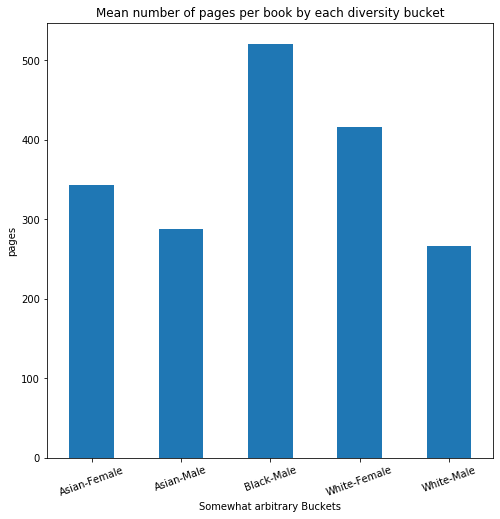

In [66]:
#%%
(
    all_df.groupby("compound_diversity")
    .mean()
    .num_pages.plot(kind="bar", stacked=True, rot=20)
)
plt.title("Mean number of pages per book by each diversity bucket")
plt.ylabel("pages")
plt.xlabel("Somewhat arbitrary Buckets")
plt.savefig(f"out/compound_diversityAvePages", bbox_inches="tight")

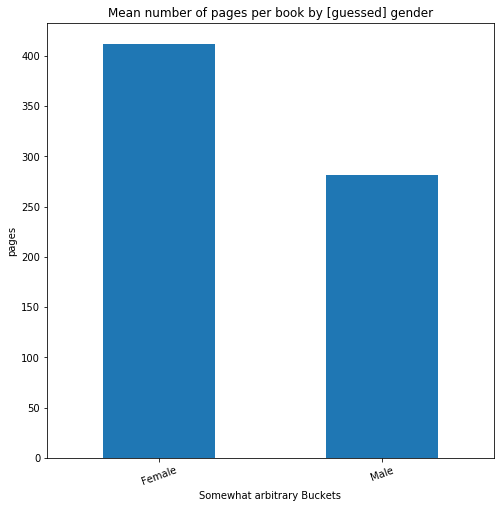

In [67]:
#%%
(all_df.groupby("gender").mean().num_pages.plot(kind="bar", stacked=True, rot=20))
plt.title("Mean number of pages per book by [guessed] gender")
plt.ylabel("pages")
plt.xlabel("Somewhat arbitrary Buckets")
plt.savefig(f"out/sexygenderyAvePages", bbox_inches="tight")

NameError: name 'tb' is not defined